In [2]:
# Required library
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Load dataset from UCI ML Repository
recipe_reviews_and_user_feedback = fetch_ucirepo(id=911)

# Get features and target
X = recipe_reviews_and_user_feedback.data.features
y = recipe_reviews_and_user_feedback.data.targets

# Combine features and target for easier inspection
df = pd.concat([X, y], axis=1)

# Display the first 5 rows
df.head()

,num_records,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [3]:
# Required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Dataset shape (rows, columns)
print("Dataset shape:", df.shape)

# Column names
print("\nColumns:\n", df.columns.tolist())

# Data types
print("\nData types:\n", df.dtypes)

# Missing value analysis
print("\nMissing values:\n", df.isnull().sum())

# Target variable distribution
print("\nTarget variable (stars) distribution:\n", df['stars'].value_counts().sort_index())

Dataset shape: (18182, 15)

Columns:
 ['num_records', 'recipe_number', 'recipe_code', 'recipe_name', 'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at', 'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score', 'text']

Data types:
 num_records         int64
recipe_number       int64
recipe_code         int64
recipe_name        object
comment_id         object
user_id            object
user_name          object
user_reputation     int64
created_at          int64
reply_count         int64
thumbs_up           int64
thumbs_down         int64
stars               int64
best_score          int64
text               object
dtype: object

Missing values:
 num_records        0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dty

In [5]:
# Target variable
target = 'stars'

# Review all columns
print("All columns:\n", df.columns.tolist())

# Columns to drop: identifiers, text, timestamps, etc.
drop_columns = ['recipe_number', 'recipe_code', 'recipe_name', 'comment_id', 'user_id',
                'user_name', 'created_at', 'text']  # dropping unstructured text etc.

# Create new DataFrame without dropped columns
df_cleaned = df.drop(columns=drop_columns)

# Check new column set
print("\nRemaining columns:\n", df_cleaned.columns.tolist())

All columns:
 ['num_records', 'recipe_number', 'recipe_code', 'recipe_name', 'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at', 'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score', 'text']

Remaining columns:
 ['num_records', 'user_reputation', 'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score']


In [6]:
# Separate features and target
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Numeric features: ['num_records', 'user_reputation', 'reply_count', 'thumbs_up', 'thumbs_down', 'best_score']
Categorical features: []


In [7]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # preserve class distribution
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Apply preprocessing to training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply the same transformation to test data
X_test_preprocessed = preprocessor.transform(X_test)

Training set shape: (14545, 6)
Test set shape: (3637, 6)


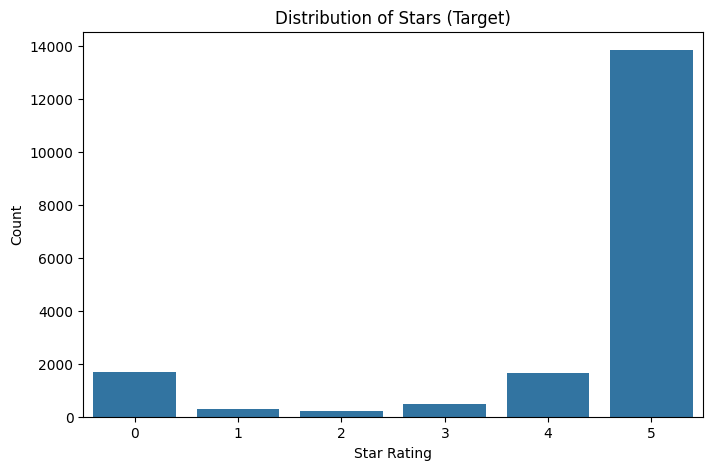

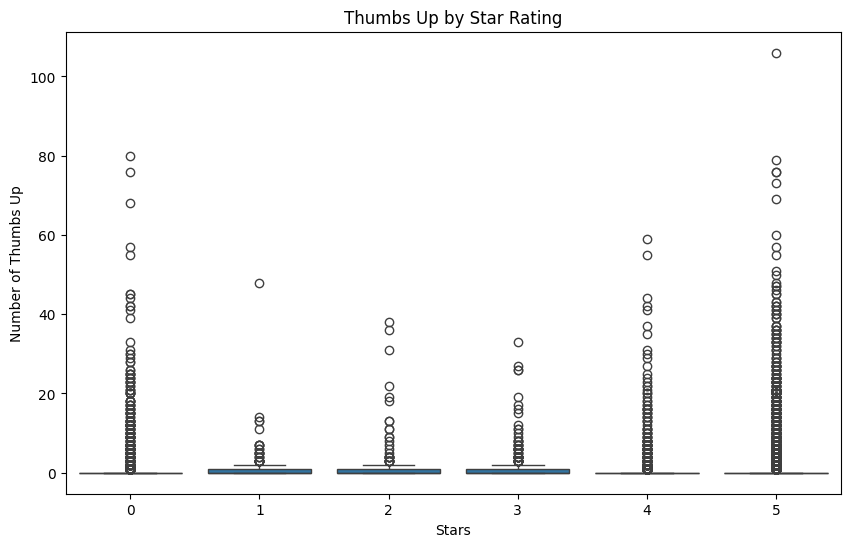

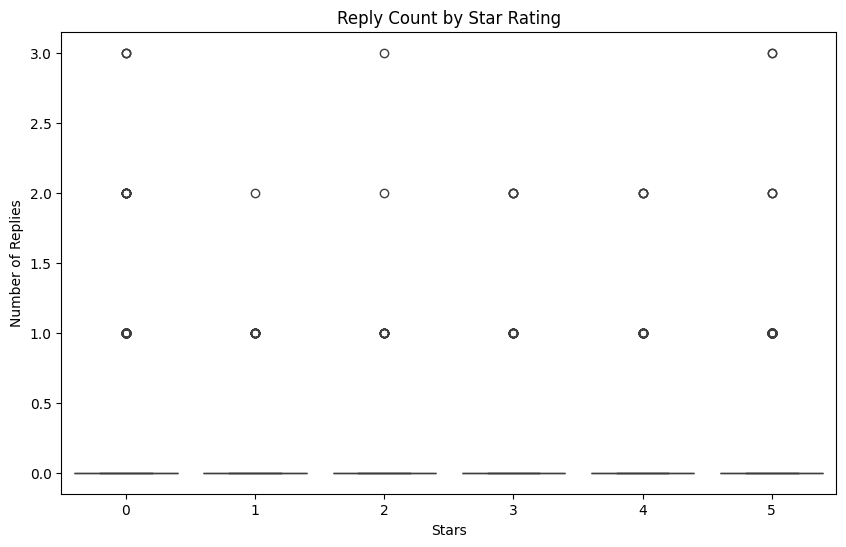

In [8]:
# Distribution of the target variable (stars)
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Distribution of Stars (Target)')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

# Relationship: thumbs_up vs. stars
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=df_cleaned['thumbs_up'])
plt.title('Thumbs Up by Star Rating')
plt.xlabel('Stars')
plt.ylabel('Number of Thumbs Up')
plt.show()

# Relationship: reply_count vs. stars
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=df_cleaned['reply_count'])
plt.title('Reply Count by Star Rating')
plt.xlabel('Stars')
plt.ylabel('Number of Replies')
plt.show()

In [9]:
print("Preprocessing and visualization steps completed successfully.")

Preprocessing and visualization steps completed successfully.
